In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data Load

In [14]:
df = pd.read_csv('data/193500_magnocellular_stimuli_2024-08-12_11h57.03.859.csv')

# Identificar todas las columnas que contienen 'key_resp[num].keys'
key_columns = [col for col in df.columns if re.match(r'key_resp_\d+.keys', col)]
key_columns.append('key_resp.keys')

In [15]:
# En cada columna de la lista 'key_columns' hay respuestas. Según el bloque en el que se hayan ejecutado se guardan en una columna u otra.
key_columns

['key_resp_4.keys',
 'key_resp_10.keys',
 'key_resp_9.keys',
 'key_resp_11.keys',
 'key_resp.keys']

In [8]:
#key_columns.pop(1)

'key_resp.keys'

In [16]:
# Crear una nueva columna 'respuesta_unificada' que combine todas las respuestas
df['respuesta_usuario'] = df[key_columns].bfill(axis=1).iloc[:, 0]

In [17]:
# Crear una nueva columna "resultado" basada en la columna 'respuesta_unificada'
df['resultado'] = ((df['respuesta_usuario'] == 'right') & (df['orientacion'] == 45)) | \
                  ((df['respuesta_usuario'] == 'left') & (df['orientacion'] == 135))

# Convertir True/False a 'Acierto'/'Fallo'
df['resultado'] = df['resultado'].map({True: 'Acierto', False: 'Fallo'})


In [18]:
resultados = df['resultado'].value_counts()
df2 = df[['intento','orientacion','respuesta_usuario', 'resultado']]

In [13]:
df2

,intento,orientacion,respuesta_usuario,resultado
0,NaN,NaN,space,Fallo
1,BL1_1,45.0,NaN,Fallo
2,BL1_2,135.0,NaN,Fallo
3,BL1_3,45.0,NaN,Fallo
4,BL1_4,135.0,NaN,Fallo
5,BL1_5,45.0,NaN,Fallo
6,BL1_6,45.0,NaN,Fallo
7,BL1_7,45.0,NaN,Fallo
8,BL1_8,135.0,NaN,Fallo
9,BL1_9,45.0,NaN,Fallo


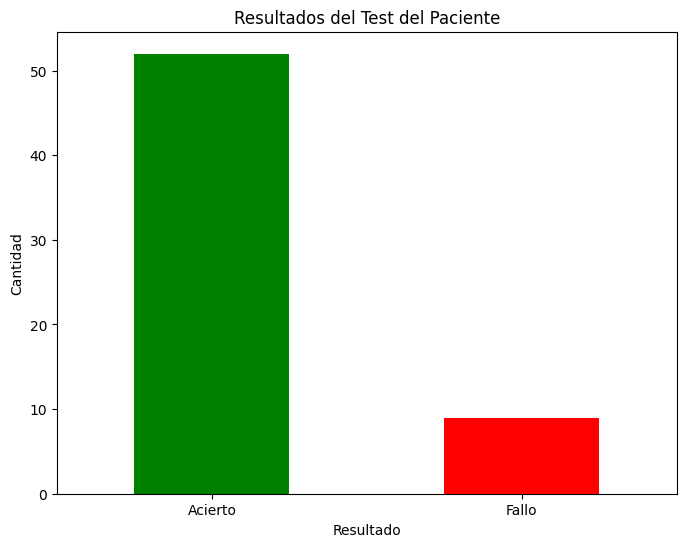

In [19]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
resultados.plot(kind='bar', color=['green', 'red'])
plt.title('Resultados del Test del Paciente')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


C:\Users\akoun\AppData\Local\Temp\ipykernel_2008\1458836009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['resultado_numerico'] = df_filtered['resultado'].map({'Acierto': 1, 'Fallo': 0})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


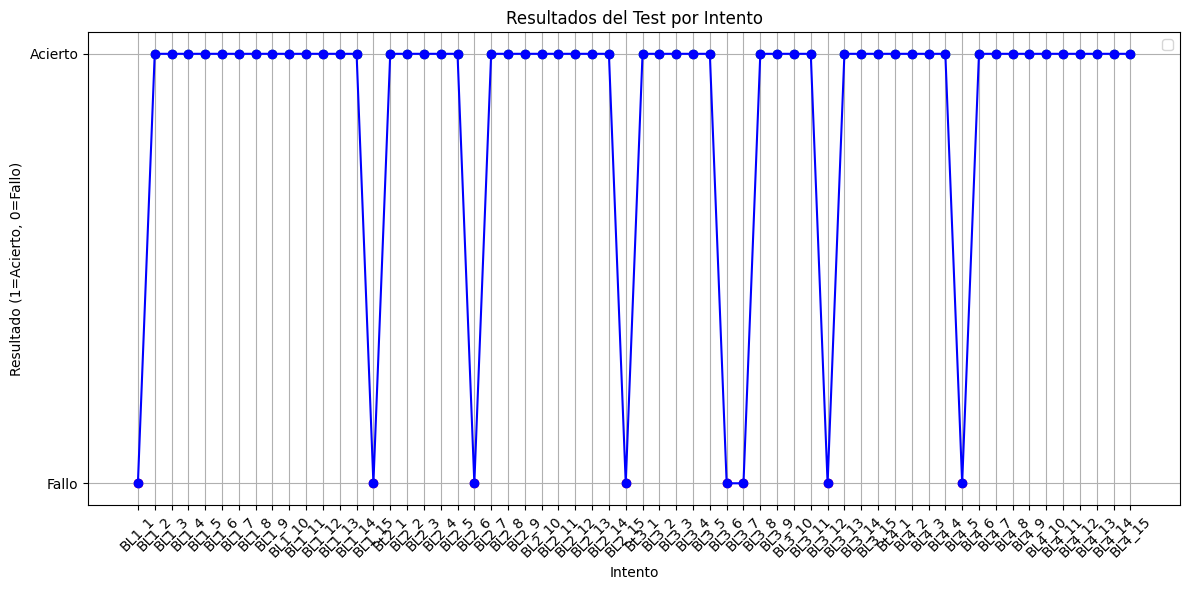

In [20]:
import matplotlib.pyplot as plt

# Filtrar los datos para excluir filas sin intentos
df_filtered = df.dropna(subset=['intento'])

# Asignar valores numéricos a los aciertos y fallos
df_filtered['resultado_numerico'] = df_filtered['resultado'].map({'Acierto': 1, 'Fallo': 0})

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['intento'], df_filtered['resultado_numerico'], marker='o', linestyle='-', color='blue')

# Resaltar los aciertos y fallos con diferentes colores
for i, row in df_filtered.iterrows():
    if row['resultado'] == 'Acierto':
        plt.scatter(row['intento'], row['resultado_numerico'], color='green', label='Acierto' if i == 0 else "")
    else:
        plt.scatter(row['intento'], row['resultado_numerico'], color='red', label='Fallo' if i == 0 else "")

# Personalizar el gráfico
plt.title('Resultados del Test por Intento')
plt.xlabel('Intento')
plt.ylabel('Resultado (1=Acierto, 0=Fallo)')
plt.yticks([0, 1], ['Fallo', 'Acierto'])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Staircase Test Analytics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def generate_staircase_test_graph(test_var_name : str, results_csv_path):
    
    data = pd.read_csv(results_csv_path)

    # Filtrar filas con reversals
    reversal_data = data[data['reversals'] > 0]

    # Calcular el umbral de la variable como la media de las últimas n inversiones (reversals)
    n_reversals_to_average = 9  # En general, se toma la media de las ultimas n inversiones
    threshold = reversal_data[test_var_name].tail(n_reversals_to_average).mean()

    # Graficar la variable objetivo del estímulo a lo largo de los ensayos
    plt.figure(figsize=(10, 6))
    plt.plot(data['trial'], data[test_var_name], marker='o', linestyle='-', label=f'Stimulus {test_var_name}')

    # Línea horizontal para el umbral de la variable
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.3f}')

    # Config. del grafico
    plt.xlabel('Number of Trials')
    plt.ylabel(f'Stimulus {test_var_name}')
    plt.title(f'Stimulus {test_var_name} Across Trials')
    plt.legend()
    plt.grid(True)

    plt.show()

    print(f"Umbral estimado: {threshold:.3f}")

In [4]:
def get_threshold(test_var_name : str, results_csv_path):
    data = pd.read_csv(results_csv_path)

    # Filtrar filas con reversals
    reversal_data = data[data['reversals'] > 0]

    n_reversals_to_average = 9
    threshold = reversal_data[test_var_name].tail(n_reversals_to_average).mean()

    return threshold-50

print(get_threshold('saturation', './data/saturation_staircase_test_data.csv'))

0.9027777777777786


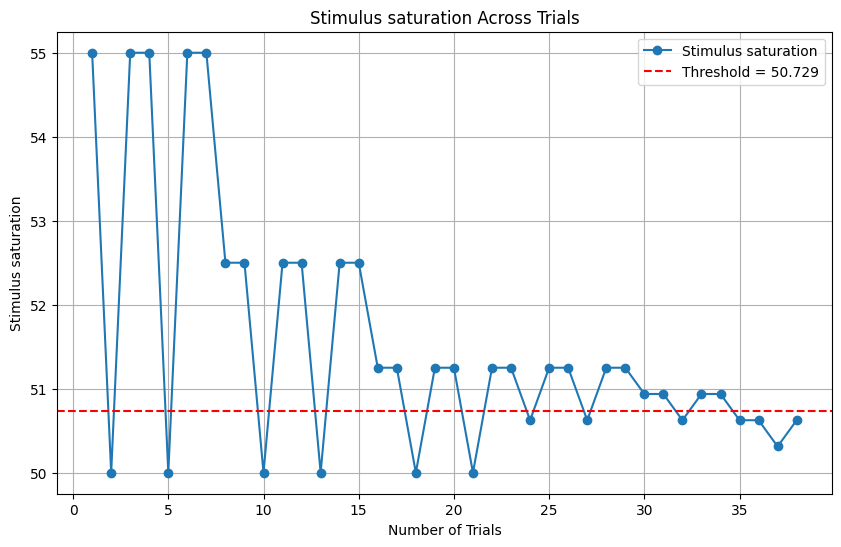

Umbral estimado: 50.729


In [7]:
generate_staircase_test_graph(results_csv_path='./data/saturation_staircase_test_data_red.csv', test_var_name='saturation')

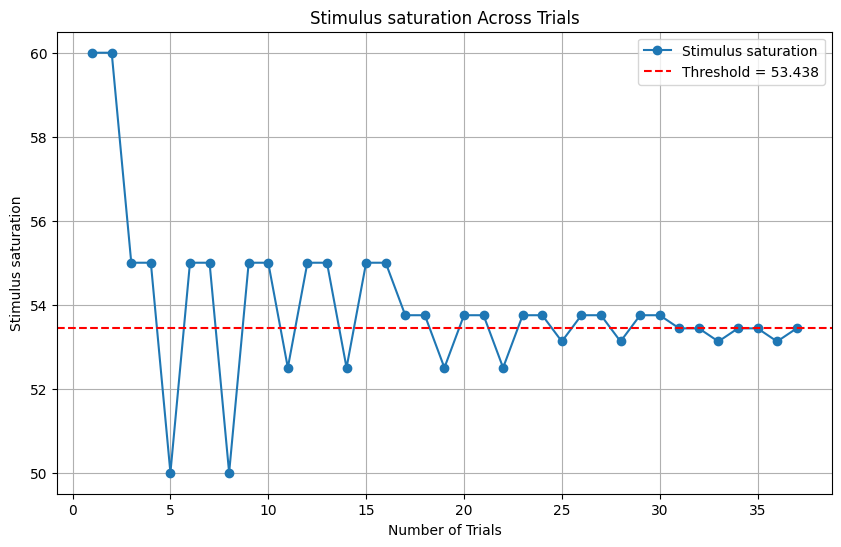

Umbral estimado: 53.438


In [8]:
generate_staircase_test_graph(results_csv_path='./data/saturation_staircase_test_data_green.csv', test_var_name='saturation')

In [1]:
generate_staircase_test_graph(results_csv_path='./data/contrast_staircase_test_data.csv', test_var_name='contrast')

NameError: name 'generate_staircase_test_graph' is not defined

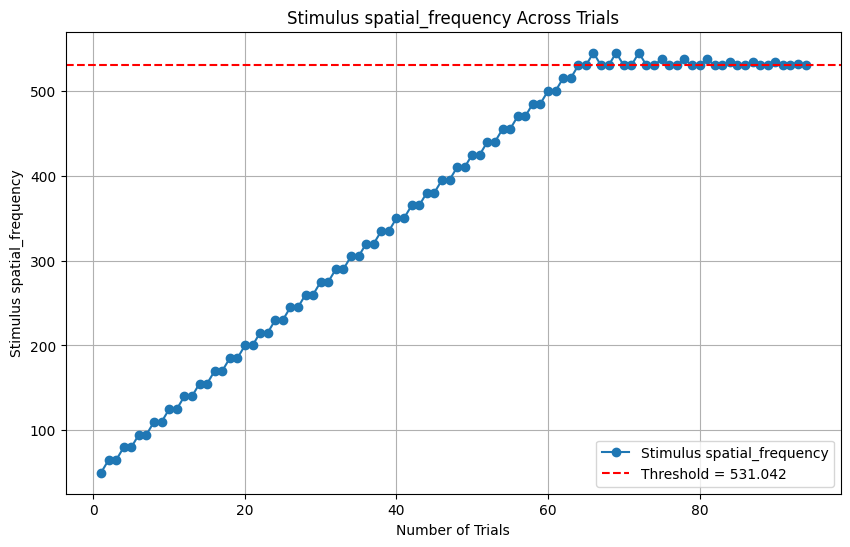

Umbral estimado: 531.042


In [5]:
generate_staircase_test_graph(results_csv_path='./data/sf_staircase_test_data.csv', test_var_name='spatial_frequency')

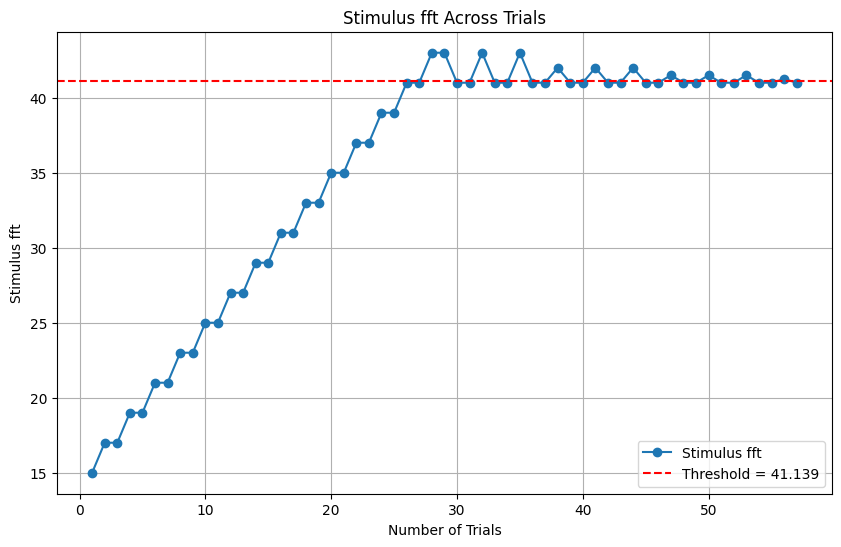

Umbral estimado: 41.139


In [6]:
generate_staircase_test_graph(results_csv_path='./data/fft_staircase_test_data.csv', test_var_name='fft')